In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#how to handle categorical  values

In [34]:
df=pd.read_csv('train (1).csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
df=df[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [10]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [12]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

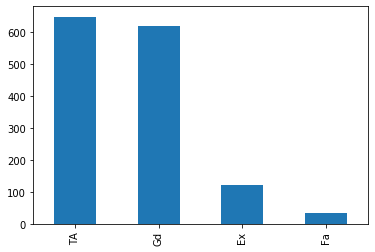

In [16]:
#compute frequencey

df['BsmtQual'].value_counts().plot(kind='bar')

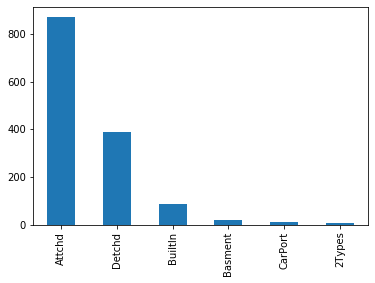

In [17]:

df['GarageType'].value_counts().plot(kind='bar')

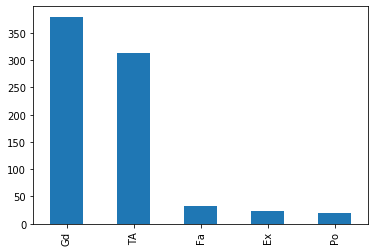

In [18]:

df['FireplaceQu'].value_counts().plot(kind='bar')

In [19]:
def impute_nan(df,col):
    freq=df[col].value_counts()[0]
    df[col].fillna(freq,inplace=True)
    
for col in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,col)

C:\Users\Chinmay Maganur\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [ ]:
#using mode to fill highest missing values is not good, it distorts dist wrt to target variableb

In [25]:
#new variablefor nanvalues
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)

C:\Users\Chinmay Maganur\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var
0,Gd,NaN,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [27]:
#suppose wehave more freq values, we try to usenan as new   category
def impute_nan(df,col):
    df[col+'new']=np.where(df[col].isnull(),'Missing',df[col])
for col in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,col)
    

C:\Users\Chinmay Maganur\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
df.head()
for col in df.iloc[:,4:]:
    print(df[col].value_counts())
    print()

0    770
1    690
Name: FireplaceQu_var, dtype: int64

TA         649
Gd         618
Ex         121
Missing     37
Fa          35
Name: BsmtQualnew, dtype: int64

Missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: FireplaceQunew, dtype: int64

Attchd     870
Detchd     387
BuiltIn     88
Missing     81
Basment     19
CarPort      9
2Types       6
Name: GarageTypenew, dtype: int64



# Handling category data

In [39]:
df=pd.read_csv('train (2).csv')

In [42]:
pd.get_dummies(df['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [46]:
df_mer=pd.read_csv('train_mercedes.csv',usecols=['X0','X2','X3','X4','X5','X6'])
df_mer.head()

,X0,X2,X3,X4,X5,X6
0,k,at,a,d,u,j
1,k,av,e,d,y,l
2,az,n,c,d,x,j
3,az,n,f,d,x,l
4,az,n,f,d,h,d


In [49]:
df_mer['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
i      18
aq     18
am     18
u      17
l      16
aw     16
ad     14
k      11
au     11
b      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [52]:
for i in df_mer.columns:
    print(len(df_mer[i].unique()))

47
44
7
4
29
12


In [60]:
#using onhot encodeing results cyrse of dimensioanlity
#to avoid this we take top10 most occuring values and use on hot encodig
lst_10=df_mer['X0'].value_counts()[:10].index
lst_10=list(lst_10)
lst_10

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [63]:
for cat in lst_10:
    df_mer[cat]=np.where(df_mer['X0']==cat,1,0)

In [64]:
df_mer

,X0,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,k,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,as,c,d,aa,d,0,1,0,0,0,0,0,0,0,0
4205,j,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,0
4206,ak,r,a,d,aa,g,0,1,0,0,0,0,0,0,0,0
4207,al,e,f,d,aa,l,0,0,0,0,0,0,0,0,0,0


In [81]:
lst_10.append('X0')


In [82]:
df_mer[lst_10]

,z,ak,y,ay,t,x,o,f,n,w,X0
0,0,0,0,0,0,0,0,0,0,0,k
1,0,0,0,0,0,0,0,0,0,0,k
2,0,0,0,0,0,0,0,0,0,0,az
3,0,0,0,0,0,0,0,0,0,0,az
4,0,0,0,0,0,0,0,0,0,0,az
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,ak
4205,0,0,0,0,0,0,0,0,0,0,j
4206,0,1,0,0,0,0,0,0,0,0,ak
4207,0,0,0,0,0,0,0,0,0,0,al
